<a href="https://colab.research.google.com/github/AnaNava1996/Proyecto_Bedu/blob/main/Entrega_Final_MachineLearning_ErendiraCelis_AnaNava_HegarGarcia_GerardoGarcia/Proyecto_Equipo10_Incendios_Forestales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicci√≥n de Incendios Forestales**
### Proyecto BEDU Data Science, Modulo Final
* Er√©ndira Celis Acosta
* Ana Paola Nava Vivas
* Hegar Jos√© Garc√≠a Rodr√≠guez
* Gerardo Leonel Garc√≠a Pegueros

# Instalaciones

In [22]:
! pip install geopandas rtree
! apt install libspatialindex-dev
! pip install --upgrade plotly
! pip install tensorflow
! pip install keras_metrics

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.0MB 4.9MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.0MB 38.6MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15.4MB 188kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.6MB 34.9MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe a

# Introducci√≥n

# Clusterizaci√≥n con K-means

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [ ]:
def fetch_fire_dataset(year):
  base_url = "https://firms.modaps.eosdis.nasa.gov/data/country/modis"
  current_url = f"{base_url}/{year}/modis_{year}_Mexico.csv"
  return pd.read_csv(current_url)

In [ ]:
fire_data = pd.concat(list(map(fetch_fire_dataset, range(2000,2020))), axis=0)
filtro_alta_confianza = fire_data['confidence'] > 90
filtro_incendios = fire_data['type'] == 0
fire_data = fire_data[filtro_alta_confianza & filtro_incendios][['longitude','latitude']]

In [ ]:
fire_data.shape

(126941, 2)

In [ ]:
X = fire_data[['latitude','longitude']].values

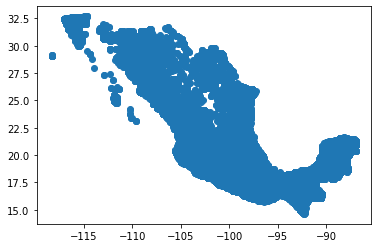

In [ ]:
plt.scatter(fire_data['longitude'],fire_data['latitude'])
plt.show()

In [ ]:
iris_dbscan = DBSCAN(eps=20/6371, min_samples=100,algorithm='ball_tree', metric='haversine')

In [ ]:
iris_dbscan.fit(np.radians(X))

DBSCAN(algorithm='ball_tree', eps=0.0031392246115209545, leaf_size=30,
       metric='haversine', metric_params=None, min_samples=100, n_jobs=None,
       p=None)

In [ ]:
labels = iris_dbscan.labels_

In [ ]:
# label=-1 means the point is an outlier. Rest of the values represent the label/cluster number starting from 0
print(labels)

[ 1 -1 -1 ... 26  2  1]


In [ ]:
# Creating a numpy array with all values set to false by default
core_samples_mask = np.zeros_like(labels, dtype=bool)

In [ ]:
# Setting core and border points (all points that are not -1) to True
core_samples_mask[iris_dbscan.core_sample_indices_] = True

In [ ]:
# Finding the number of clusters in labels (ignoring noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
# Printing the number of clusters and number of noise points (outliers)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 53
Estimated number of noise points: 13618


AQUI se tarda (se puede saltar esta celda y seguir con las dem√°s):

In [ ]:
# Evaluating the quality of clusters
s = metrics.silhouette_score(X, iris_dbscan.labels_)
print(f'Silhouette Coefficient for the Iris Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the Iris Dataset Clusters: -0.19


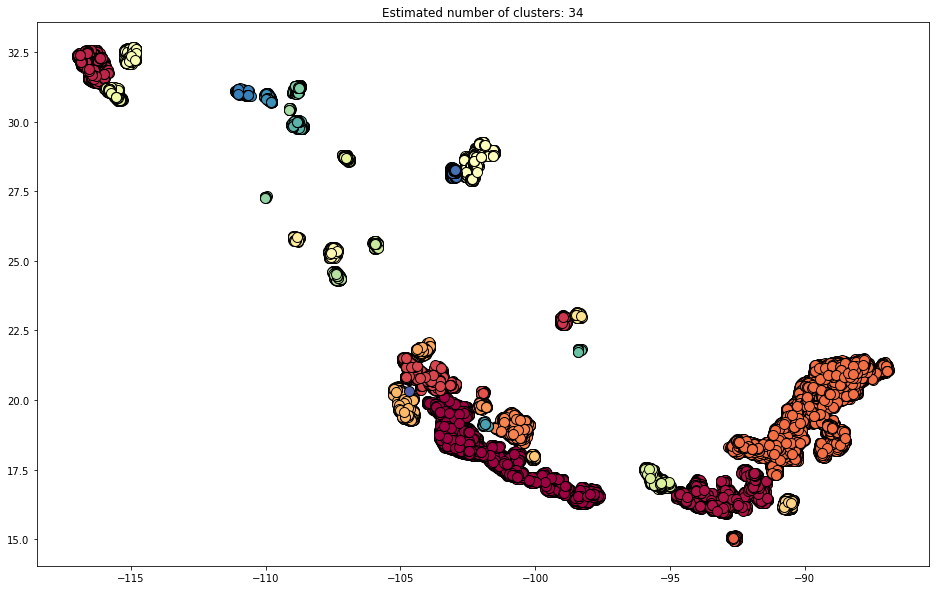

In [ ]:
unique_labels = set(labels)
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(10)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = 'k'
    
    class_member_mask = (labels == k)
    #xy = X[class_member_mask & ~core_samples_mask]
    #plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=col,
    #markeredgecolor='k', markersize=2)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=col,
    markeredgecolor='k', markersize=10)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

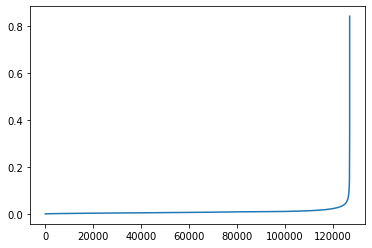

In [ ]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)[:, 1]
#print(distances)
plt.plot(distances)
plt.show()

# Predicci√≥n de tiempo.

Como vimos en entregas anteriores, exist√≠a cierta relaci√≥n entre la fecha del a√±o y la cantidad de incendios por ecorregi√≥n.

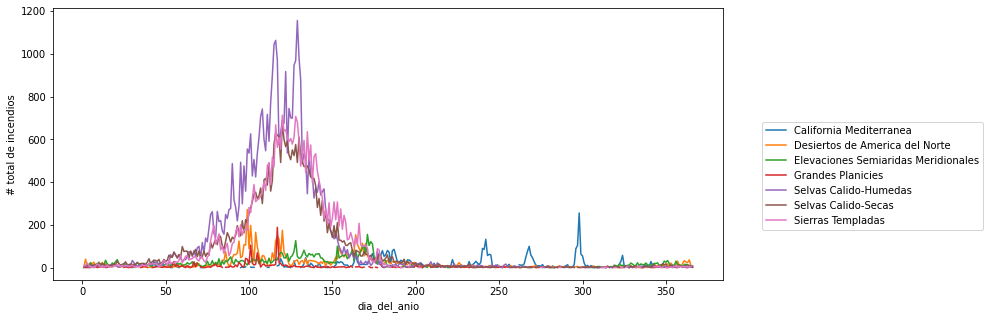

En el caso de las ecorregiones de nivel 1, escogimos arbitrariamente la de Selvas C√°lido H√∫medas ya que presentaba el pico m√°s alto en incendios y nos llam√≥ la atenci√≥n.


Se analiz√≥ la correlaci√≥n con un Scatterplot y se observ√≥ que no hab√≠a correlaci√≥n de Pearson entre el d√≠a del a√±o y el n√∫mero de incendios. Sin embargo, corroborabos que a√±o tras a√±os los puntos se concentraban hacia ciertos d√≠as del a√±o que correspond√≠an a las temporadas de sequ√≠a.

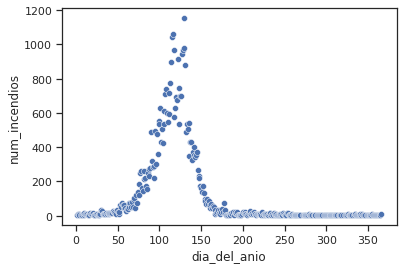

# Regresi√≥n Lineal

En alg√∫n momento nos planteamos realizar regresiones lineales por temporadas del a√±o, como se ve a continuaci√≥n donde se acot√≥ del d√≠a 1 al 125 del a√±o.

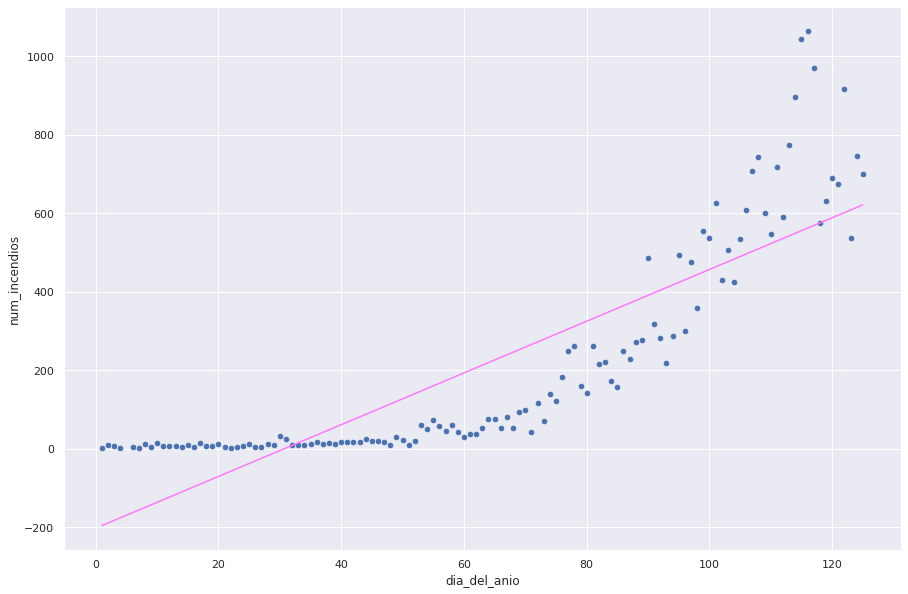

Pero siendo sinceros era una mala aproximaci√≥n. Es por esto que buscamos otras soluciones.

# Predicci√≥n con SARIMA, "Seasonality-Autorgresive-Integrated-Moving Average"

En nuestra investigaci√≥n nos encontramos con el algoritmo de Sarima que es un Arima agregando un factor de "Seasonality" puesto que nuestro caso de estudio cumpl√≠a con patrones en el a√±o. Sin embargo posteriormente descartamos este algoritmo ya que las predicciones no eran lo suficientemente buenas y exist√≠a un retraso en las mismas con respecto al control incluso tras intentar diversos ajustes.

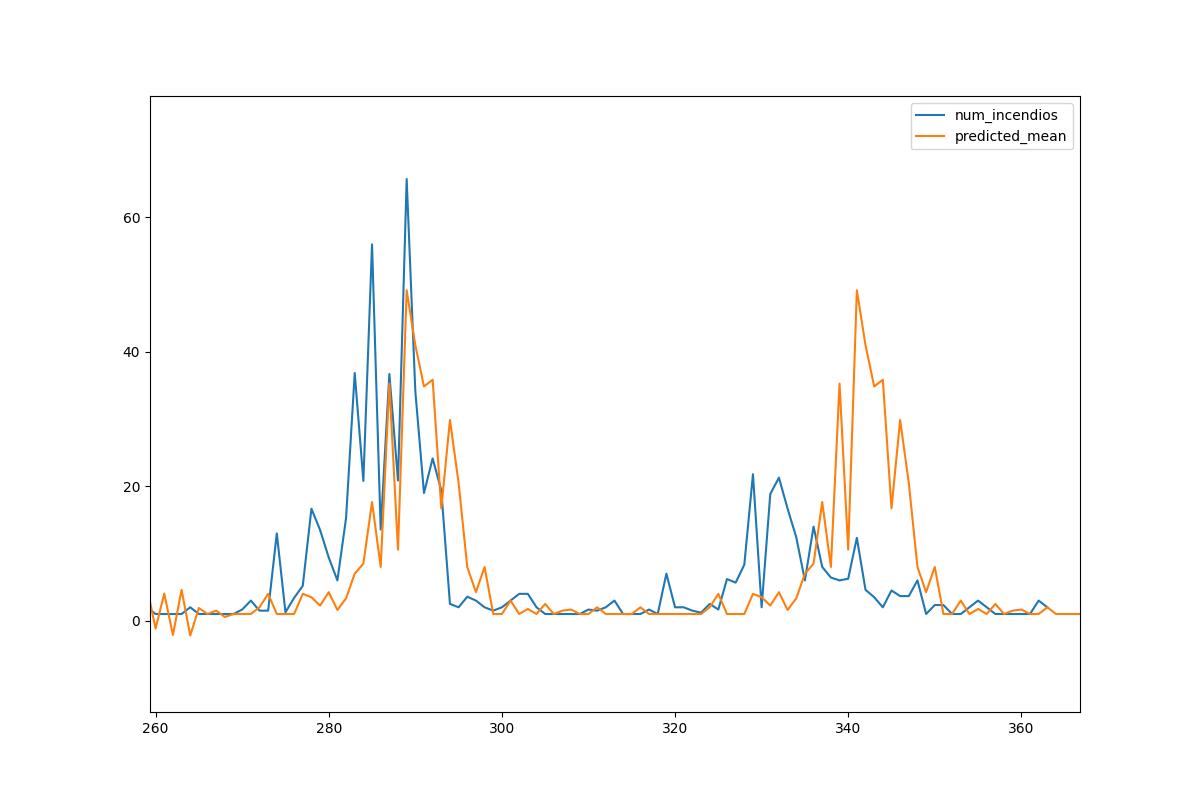

Para ver el c√≥digo de Sarima, dar click [aqu√≠](https://github.com/AnaNava1996/Proyecto_Bedu/blob/main/Entrega_Final_MachineLearning_ErendiraCelis_AnaNava_HegarGarcia_GerardoGarcia/otros_programas/sarima.py)

Sarima no funcion√≥ porque no es un buen modelo cuando se tienen tantos datos. evidentemente existe un patr√≥n que se repite a√±o tras a√±o, y con Sarima habr√≠a sido mejor medir en lugar de d√≠as, los meses... y eso no nos interesaba porque quer√≠amos obtener el valor de 1 d√≠a espec√≠fico.

# Predicci√≥n utilizando LSTM üéâ

Una opci√≥n era usar deep learning para este problema, como vimos en clase una red puede equivaler a una regresi√≥n log√≠stica.

Entre las opciones estaba la "Recurrent Neural Network" (RNN), pero es una red que presenta un problema de "vanishing gradient" ya que en cada "back propagation" disminuyen las gradientes y por lo tanto los pesos y bias dejan de actualizarse, es decir, el algoritmo deja de aprender.

A diferencia de las RNN, las LSTM o "Long Short Term Memory" no sufren del problema de gradiente que se desvanece, y son mejores para aprender con sets de datos muy largos. Es como si tuvieran memoria a largo y corto plazo.

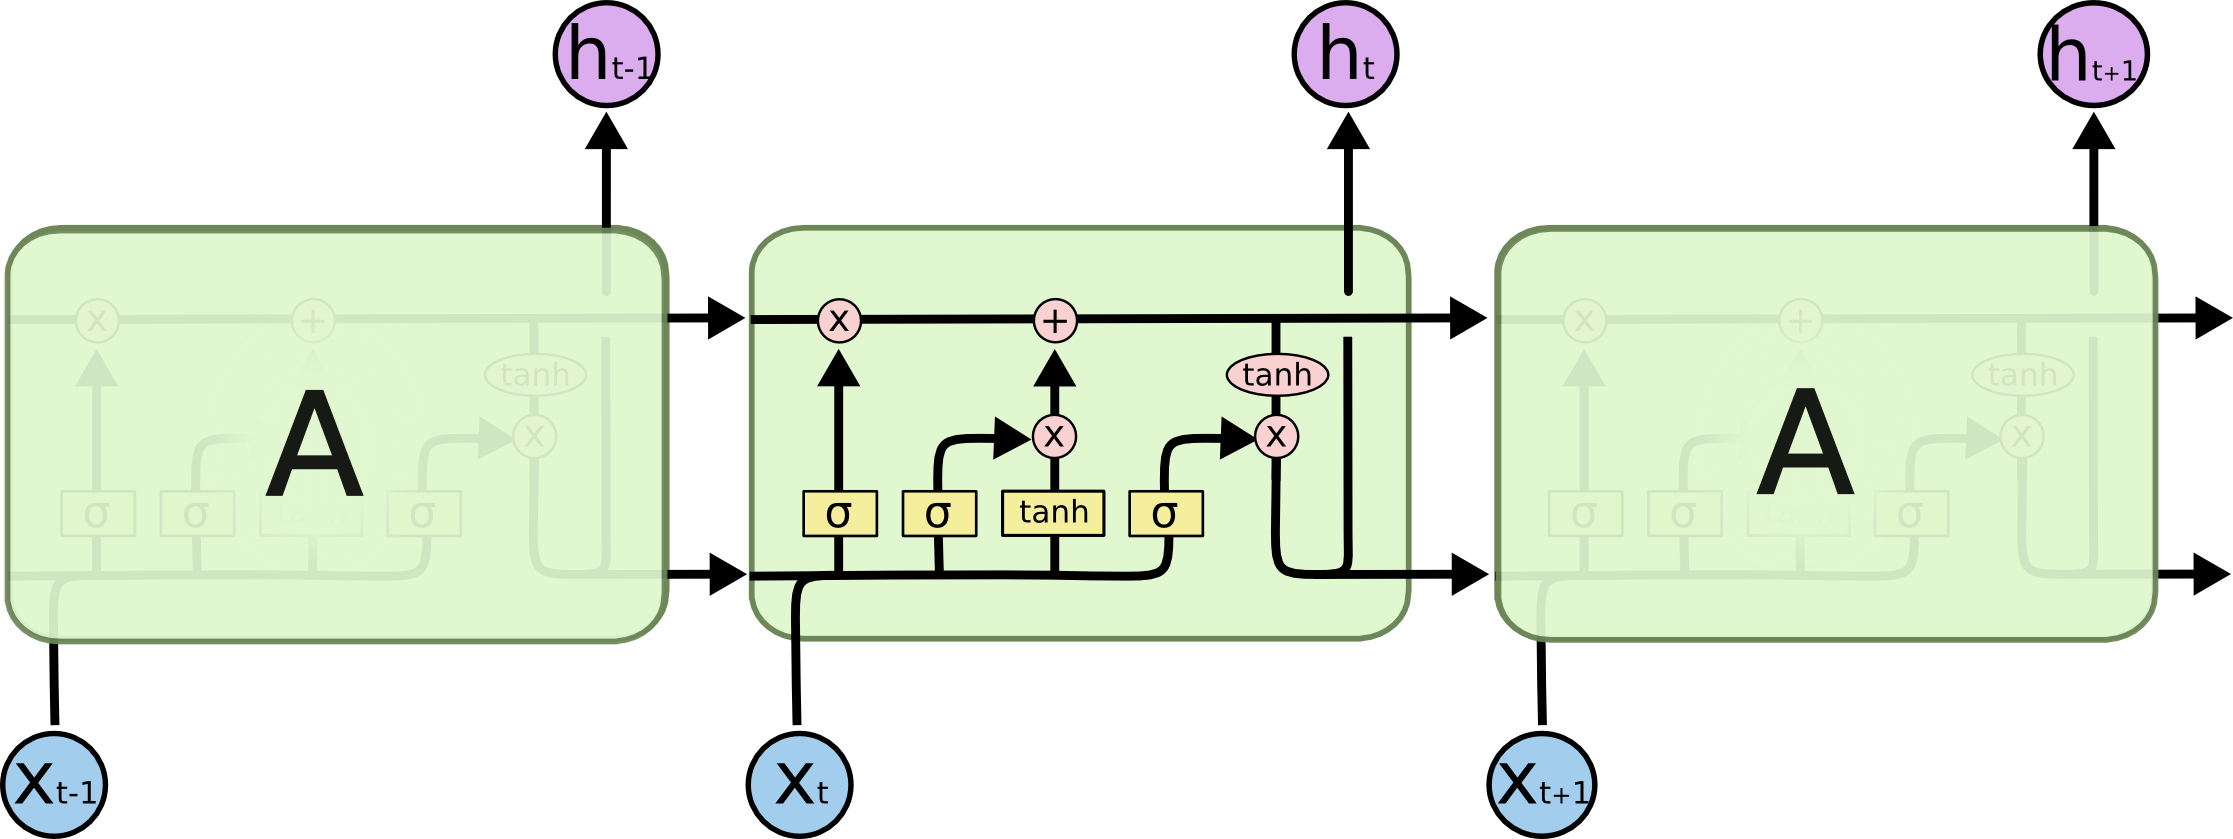

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import keras_metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Vamos a crear una funci√≥n para retornar dos arreglos de numpy basados en el set de datos que ya tenemos. El par√°metro de look_back tendr√° por defecto el valor de 30 que corresponde a aproximadamente un mes.

In [68]:
def create_dataset(dataset, look_back=30):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        dataX.append(dataset[i:(i+look_back), 0])#tomo 30 fechas - de fila de 0 a 29
        dataY.append(dataset[i + look_back, 0])#tomo la fecha 30... y asi sucesivamente...
    
    return np.array(dataX), np.array(dataY)


In [69]:
#Funci√≥n que le a√±ade las fechas restantes en ceros. USO: df = makeDate(df)
def makeDate(df,begin=True):
    df.fecha = pd.to_datetime(df.fecha)
    print(df)
    df['d√≠a'] = df.fecha.dt.day
    #df['semana'] = fdf.index.week
    df['mes'] = df.fecha.dt.month
    df['a√±o'] = df.fecha.dt.year
    df = df.groupby(['a√±o','mes','d√≠a'],as_index=True).sum().reset_index()
    
    df['fecha'] = df[['a√±o','mes','d√≠a']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
    if begin: df.fecha = pd.to_datetime(df.fecha)
    df.set_index(['fecha'],inplace=True)
    idx = pd.date_range(min(df.index), max(df.index))
    df = df.reindex(idx,fill_value=0)
    df.drop(['a√±o','mes','d√≠a'], axis = 1, inplace=True)
    return df

Vamos a abrir el data set de incendios en las ecorregiones de tipo 1 por fechas, que obtuvimos en m√≥dulos anteriores. En este caso vamos a filtrar y predecir las Selvas C√°lido H√∫medas.

In [70]:
columna = 'ecorregion_nivel_1'

df = pd.read_csv("https://raw.githubusercontent.com/AnaNava1996/Proyecto_Bedu/main/Entrega_Final_MachineLearning_ErendiraCelis_AnaNava_HegarGarcia_GerardoGarcia/datasets/incendios_x_fecha_x_ecorregion.csv",parse_dates=True)[['fecha','num_incendios',columna]]
df = df.loc[df[columna] == "Selvas Calido-Humedas"]
del df[columna]
df = makeDate(df)

np.random.seed(100)

           fecha  num_incendios
7660  2000-11-29              1
7661  2000-12-06              1
7662  2000-12-20              1
7663  2001-01-11              1
7664  2001-01-25              1
...          ...            ...
10343 2019-12-09              4
10344 2019-12-11              1
10345 2019-12-16              2
10346 2019-12-24              1
10347 2019-12-30              1

[2688 rows x 2 columns]


Convierto los datos a tipo float.

In [71]:
dataset = df.values
dataset = dataset.astype('float32')#convierto el numero de incendios a float

Normalizo a una escala de m√≠nimo 0 y m√°ximo 1. Esto se hace para que los datos puedan pasar por las funciones de activaci√≥n.

In [72]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

Particiono los datos en set de entrenamiento y set de prueba para comparar la predicci√≥n con el valor real en la fecha.

In [73]:
train_size = int(len(dataset) * 0.7) #Tama√±o del entrenamiento
test_size = len(dataset) - train_size #Tama√±o de la prueba
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [74]:
#Convertir los datos de entrenamiento a arreglos de numpy
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [75]:
#Reshape de los datos para prepararlos para la red neuoronal
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Ahora s√≠, voy a crear el modelo LSTM, usando la funci√≥n Sequential() de la librer√≠a Keras, ya que mis datos son de tiempo y eso es una secuencia.
Tendr√© 2 capas de 256 neuronas que es una potencia de 2, la primera capa recibe valores con la forma de un vector del tama√±o del lookback

El valor del Dropout, es la probabilidad con la que no se deja pasar el resultado de la funci√≥n $$h(t)$$ a la siguiente capa. Esto nos evita el overfitting.

In [76]:
#Crear el modelo LSTM
model = Sequential()#porque serie de tiempo.
#Primera capa de 256 entradas
model.add(LSTM(256, input_shape=(1, look_back),return_sequences=True))#agrego una capa de 256 neuronas...
model.add(Dropout(0.9))#evita overfiting
#Segunda capa de 256 entradas
model.add(LSTM(256, input_shape=(1, int(look_back/3))))


Los resultados de la segunda capa pasan a la capa Densa que es una sola neurona con funci√≥n de activaci√≥n **Selu** y va a entregar el resultado final de una sola predicci√≥n.

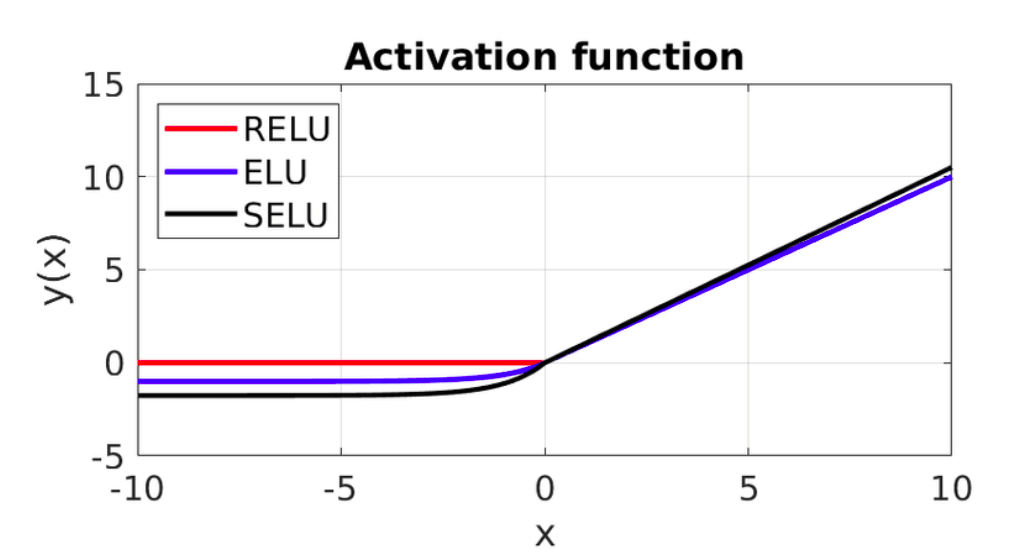

In [77]:
#Capa densa, la capa que recibe todo.
model.add(Dense(1))
#Funci√≥n de activaci√≥n
model.add(Activation('selu'))
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['accuracy','mae',keras_metrics.recall()])

In [78]:
#Se entrena la red neuronal con el dataset "epochs" veces.
model.fit(trainX, trainY, epochs=16, batch_size=15, verbose=2)#verbose=0 para no imprimir los epoch

#Resultado de las predicciones sobre los datos de entrenamiento y los datos de prueba
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


Epoch 1/16


/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:1307: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


324/324 - 9s - loss: 0.0027 - accuracy: 0.6304 - mae: 0.0244 - recall: 0.0000e+00
Epoch 2/16
324/324 - 4s - loss: 0.0022 - accuracy: 0.6304 - mae: 0.0225 - recall: 0.0000e+00
Epoch 3/16
324/324 - 4s - loss: 0.0022 - accuracy: 0.6304 - mae: 0.0221 - recall: 0.0000e+00
Epoch 4/16
324/324 - 4s - loss: 0.0022 - accuracy: 0.6304 - mae: 0.0212 - recall: 0.0000e+00
Epoch 5/16
324/324 - 4s - loss: 0.0021 - accuracy: 0.6304 - mae: 0.0209 - recall: 0.0145
Epoch 6/16
324/324 - 4s - loss: 0.0021 - accuracy: 0.6304 - mae: 0.0210 - recall: 0.0192
Epoch 7/16
324/324 - 4s - loss: 0.0020 - accuracy: 0.6304 - mae: 0.0207 - recall: 0.0220
Epoch 8/16
324/324 - 5s - loss: 0.0020 - accuracy: 0.6304 - mae: 0.0207 - recall: 0.0287
Epoch 9/16
324/324 - 5s - loss: 0.0020 - accuracy: 0.6304 - mae: 0.0204 - recall: 0.0328
Epoch 10/16
324/324 - 4s - loss: 0.0021 - accuracy: 0.6304 - mae: 0.0204 - recall: 0.0414
Epoch 11/16
324/324 - 4s - loss: 0.0020 - accuracy: 0.6304 - mae: 0.0198 - recall: 0.0461
Epoch 12/16
32

Desnormalizamos los datos que anteriormente hab√≠an pasado a una escala de 0 a 1.

In [79]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Calculamos el Root Median Square Error.

 $$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$

In [80]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.4f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.4f RMSE' % (testScore))

Train Score: 13.1584 RMSE
Test Score: 10.2674 RMSE


Teniendo en cuenta que el rango de mi data set va de 0 incendios a 222 incendios registrados en un solo d√≠a (el pico m√°s alto). Consideramos que un error de 11.0396/222, es decir 0.049 es bueno.

**Por lo que nuestro modelo tiene una exactitud de 95.1% üéâüéâüéâ**

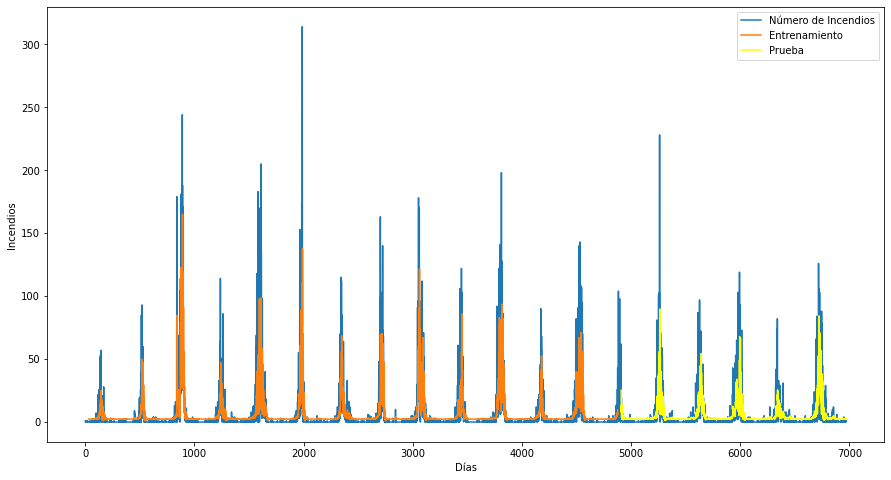

In [81]:
#Desplazamiento de datos para graficaci√≥n
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

#Desplazamiento de datos para graficaci√≥n
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

#Plot
plt.figure(figsize=(15,8))
plt.plot(scaler.inverse_transform(dataset),label='N√∫mero de Incendios')
plt.plot(trainPredictPlot,label='Entrenamiento')
plt.plot(testPredictPlot,color='yellow',label='Prueba')
plt.xlabel('D√≠as')
plt.ylabel('Incendios')
plt.legend()
plt.show()

# Conclusiones

Sarima no funcion√≥ porque no es un buen modelo cuando se tienen tantos datos. evidentemente existe un patr√≥n que se repite a√±o tras a√±o, y con Sarima habr√≠a sido mejor medir en lugar de d√≠as, los meses... y eso no nos interesaba porque quer√≠amos obtener el valor de 1 d√≠a espec√≠fico.

Para nuestra serie de tiempo, el algoritmo que mejor se adapt√≥ fue el de LSTM.

# Referencias

[1] https://towardsdatascience.com/k-means-vs-dbscan-clustering-49f8e627de27|

[2] https://colah.github.io/posts/2015-08-Understanding-LSTMs/

[3] https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

[4] https://stats.stackexchange.com/questions/56302/what-are-good-rmse-values

[5] https://www.quora.com/Why-is-the-number-of-neurons-in-a-neural-network-recommended-to-be-a-power-of-two#:~:text=It%20is%20just%20because%20of,be%20powers%20of%20two%2C%20too.